# Blending
## This notebook outlines the Blending technique used in Ensembling of Machine Learning models.

### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

### Read the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")

In [4]:
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [347]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Check for missing values in the dataset

<AxesSubplot:>

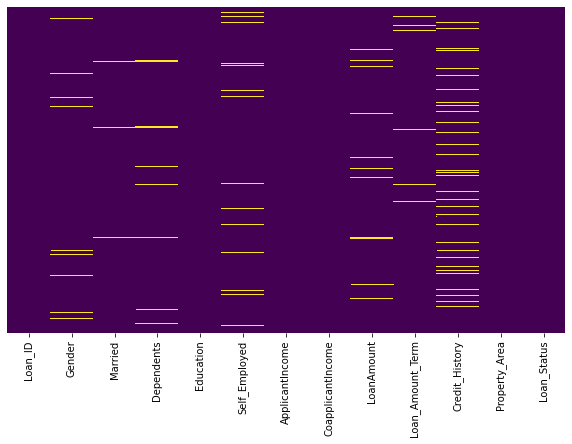

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Observations
- Lots of missing values
- Lots of categorical features

### Split them into categorical and numerical features

In [348]:
cat_df = df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']]

In [349]:
num_df = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

In [350]:
y_df = df[['Loan_Status']]

### Check missing values in categorical features

<AxesSubplot:>

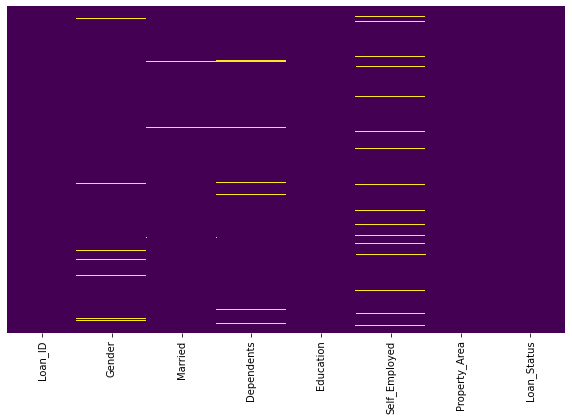

In [351]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Imputing Categorical features
- Gender
- Married
- Dependents
- Self_Employed

### Find the most occuring values in the feature

### Gender

In [352]:
cat_df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

### Fill missing values with the most occuring value

In [353]:
cat_df['Gender'].fillna('Male', inplace=True)
cat_df.Gender.value_counts()

/Users/subashgandyer/opt/anaconda3/envs/testing/lib/python3.8/site-packages/pandas/core/series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Male      502
Female    112
Name: Gender, dtype: int64

### Sanity Check

<AxesSubplot:>

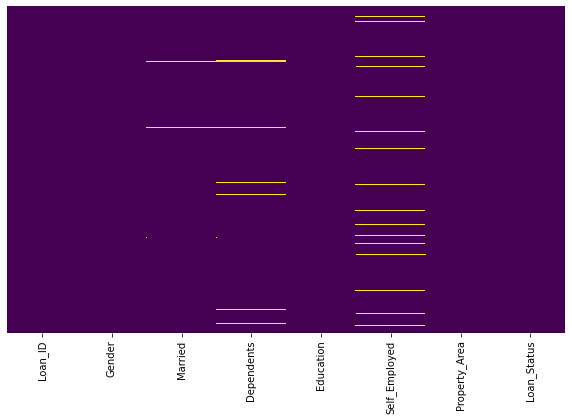

In [354]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Married

In [355]:
cat_df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [356]:
cat_df['Married'].fillna("Yes", inplace=True)
cat_df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

<AxesSubplot:>

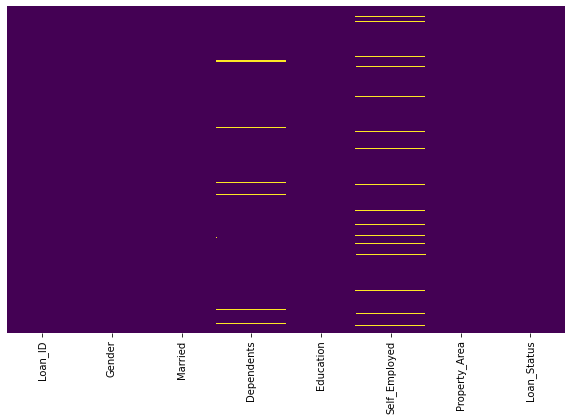

In [357]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Dependents

In [358]:
cat_df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [359]:
cat_df['Dependents'].fillna("0", inplace=True)
cat_df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:>

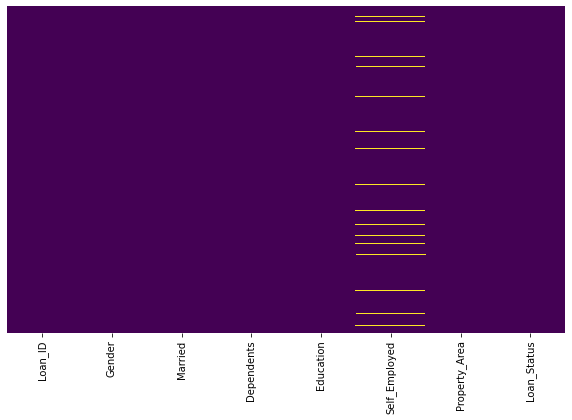

In [360]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Self_Employed

In [361]:
cat_df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [362]:
cat_df['Self_Employed'].fillna("No", inplace=True)

<AxesSubplot:>

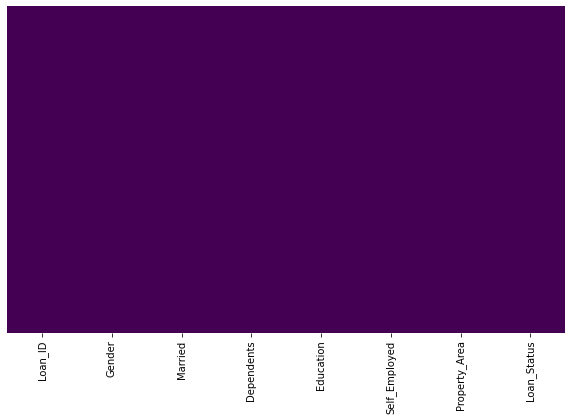

In [363]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Checking the missing values in Numerical features

<AxesSubplot:>

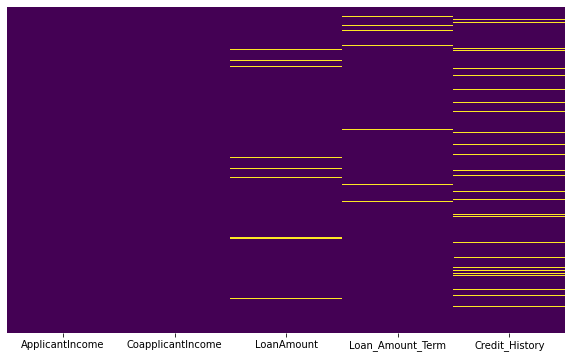

In [364]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Impute the missing values forr numerical features

In [365]:
from sklearn.impute import SimpleImputer

In [366]:
imputer = SimpleImputer(strategy='mean')

### Fit on the features

In [367]:
imputer.fit(num_df)

SimpleImputer()

In [368]:
num_df_transform = imputer.transform(num_df)

In [369]:
num_df = pd.DataFrame(data=num_df_transform)
num_df.columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
num_df

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0  146.412162             360.0   
1             4583.0             1508.0  128.000000             360.0   
2             3000.0                0.0   66.000000             360.0   
3             2583.0             2358.0  120.000000             360.0   
4             6000.0                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0   71.000000             360.0   
610           4106.0                0.0   40.000000             180.0   
611           8072.0              240.0  253.000000             360.0   
612           7583.0                0.0  187.000000             360.0   
613           4583.0                0.0  133.000000             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

<AxesSubplot:>

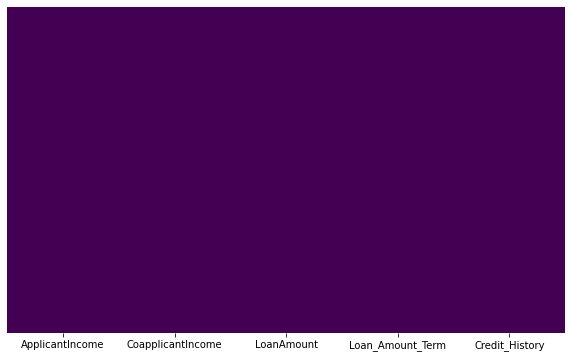

In [370]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Convert Categorical features into Numerical features

In [371]:
from sklearn.preprocessing import LabelEncoder

In [372]:
label_encoder = LabelEncoder()

In [373]:
def clean_dep(x):
    return x[0]

In [374]:
cat_df['Property_Area']= label_encoder.fit_transform(cat_df['Property_Area'])
cat_df['Gender']= label_encoder.fit_transform(cat_df['Gender'])
cat_df['Education']= label_encoder.fit_transform(cat_df['Education']) 
cat_df['Self_Employed']= label_encoder.fit_transform(cat_df['Self_Employed'])
cat_df['Married']= label_encoder.fit_transform(cat_df['Married'])
cat_df['Dependents'] = cat_df['Dependents'].apply(clean_dep)
cat_df['Dependents']= label_encoder.fit_transform(cat_df['Dependents'])
cat_df['Loan_Status']= label_encoder.fit_transform(cat_df['Loan_Status'])
cat_df

<ipython-input-374-32bee176e181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Property_Area']= label_encoder.fit_transform(cat_df['Property_Area'])
<ipython-input-374-32bee176e181>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Gender']= label_encoder.fit_transform(cat_df['Gender'])
<ipython-input-374-32bee176e181>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001002       1        0           0          0              0   
1    LP001003       1        1           1          0              0   
2    LP001005       1        1           0          0              1   
3    LP001006       1        1           0          1              0   
4    LP001008       1        0           0          0              0   
..        ...     ...      ...         ...        ...            ...   
609  LP002978       0        0           0          0              0   
610  LP002979       1        1           3          0              0   
611  LP002983       1        1           1          0              0   
612  LP002984       1        1           2          0              0   
613  LP002990       0        0           0          0              1   

     Property_Area  Loan_Status  
0                2            1  
1                0            0  
2                2            1  
3                2            1  
4                2            1  
..             ...          ...  
609              0            1  
610              0            1  
611              2            1  
612              2            1  
613              1            0  

[614 rows x 8 columns]

In [375]:
cat_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [376]:
cat_df = cat_df.drop('Loan_ID', axis=1)
cat_df

Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        0           0          0              0              2   
1         1        1           1          0              0              0   
2         1        1           0          0              1              2   
3         1        1           0          1              0              2   
4         1        0           0          0              0              2   
..      ...      ...         ...        ...            ...            ...   
609       0        0           0          0              0              0   
610       1        1           3          0              0              0   
611       1        1           1          0              0              2   
612       1        1           2          0              0              2   
613       0        0           0          0              1              1   

     Loan_Status  
0              1  
1              0  
2              1  
3              1  
4              1  
..           ...  
609            1  
610            1  
611            1  
612            1  
613            0  

[614 rows x 7 columns]

### Concatenate the numerical features and categorical features

In [377]:
df_transform = pd.concat([cat_df, num_df], axis=1)
df_transform

Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        0           0          0              0              2   
1         1        1           1          0              0              0   
2         1        1           0          0              1              2   
3         1        1           0          1              0              2   
4         1        0           0          0              0              2   
..      ...      ...         ...        ...            ...            ...   
609       0        0           0          0              0              0   
610       1        1           3          0              0              0   
611       1        1           1          0              0              2   
612       1        1           2          0              0              2   
613       0        0           0          0              1              1   

     Loan_Status  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0              1           5849.0                0.0  146.412162   
1              0           4583.0             1508.0  128.000000   
2              1           3000.0                0.0   66.000000   
3              1           2583.0             2358.0  120.000000   
4              1           6000.0                0.0  141.000000   
..           ...              ...                ...         ...   
609            1           2900.0                0.0   71.000000   
610            1           4106.0                0.0   40.000000   
611            1           8072.0              240.0  253.000000   
612            1           7583.0                0.0  187.000000   
613            0           4583.0                0.0  133.000000   

     Loan_Amount_Term  Credit_History  
0               360.0             1.0  
1               360.0             1.0  
2               360.0             1.0  
3               360.0             1.0  
4               360.0             1.0  
..                ...             ...  
609             360.0             1.0  
610             180.0             1.0  
611             360.0             1.0  
612             360.0             1.0  
613             360.0             0.0  

[614 rows x 12 columns]

### Sanity check
- Check for missing values
- Check for categorical features

<AxesSubplot:>

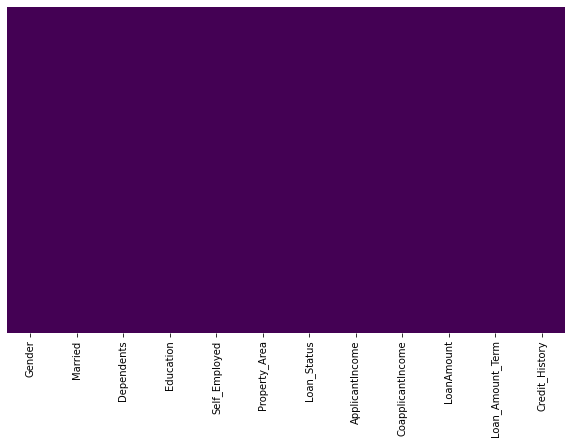

In [378]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [379]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   Property_Area      614 non-null    int64  
 6   Loan_Status        614 non-null    int64  
 7   ApplicantIncome    614 non-null    float64
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         614 non-null    float64
 10  Loan_Amount_Term   614 non-null    float64
 11  Credit_History     614 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


### Split them into X and y

In [412]:
df_transform

Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        0           0          0              0              2   
1         1        1           1          0              0              0   
2         1        1           0          0              1              2   
3         1        1           0          1              0              2   
4         1        0           0          0              0              2   
..      ...      ...         ...        ...            ...            ...   
609       0        0           0          0              0              0   
610       1        1           3          0              0              0   
611       1        1           1          0              0              2   
612       1        1           2          0              0              2   
613       0        0           0          0              1              1   

     Loan_Status  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0              1           5849.0                0.0  146.412162   
1              0           4583.0             1508.0  128.000000   
2              1           3000.0                0.0   66.000000   
3              1           2583.0             2358.0  120.000000   
4              1           6000.0                0.0  141.000000   
..           ...              ...                ...         ...   
609            1           2900.0                0.0   71.000000   
610            1           4106.0                0.0   40.000000   
611            1           8072.0              240.0  253.000000   
612            1           7583.0                0.0  187.000000   
613            0           4583.0                0.0  133.000000   

     Loan_Amount_Term  Credit_History  
0               360.0             1.0  
1               360.0             1.0  
2               360.0             1.0  
3               360.0             1.0  
4               360.0             1.0  
..                ...             ...  
609             360.0             1.0  
610             180.0             1.0  
611             360.0             1.0  
612             360.0             1.0  
613             360.0             0.0  

[614 rows x 12 columns]

In [381]:
X = df_transform.drop('Loan_Status', axis=1)
X

Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        0           0          0              0              2   
1         1        1           1          0              0              0   
2         1        1           0          0              1              2   
3         1        1           0          1              0              2   
4         1        0           0          0              0              2   
..      ...      ...         ...        ...            ...            ...   
609       0        0           0          0              0              0   
610       1        1           3          0              0              0   
611       1        1           1          0              0              2   
612       1        1           2          0              0              2   
613       0        0           0          0              1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0  146.412162             360.0   
1             4583.0             1508.0  128.000000             360.0   
2             3000.0                0.0   66.000000             360.0   
3             2583.0             2358.0  120.000000             360.0   
4             6000.0                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0   71.000000             360.0   
610           4106.0                0.0   40.000000             180.0   
611           8072.0              240.0  253.000000             360.0   
612           7583.0                0.0  187.000000             360.0   
613           4583.0                0.0  133.000000             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 11 columns]

In [383]:
y = df_transform['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [384]:
X.shape, y.shape

((614, 11), (614,))

# Load the cleaned dataset

### Import the libraries

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

### Load the dataset
Dataset: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_prediction.csv

In [26]:
df = pd.read_csv("loan_prediction.csv")
df

Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        0           0          0              0              2   
1         1        1           1          0              0              0   
2         1        1           0          0              1              2   
3         1        1           0          1              0              2   
4         1        0           0          0              0              2   
..      ...      ...         ...        ...            ...            ...   
609       0        0           0          0              0              0   
610       1        1           3          0              0              0   
611       1        1           1          0              0              2   
612       1        1           2          0              0              2   
613       0        0           0          0              1              1   

     Loan_Status  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0              1           5849.0                0.0  146.412162   
1              0           4583.0             1508.0  128.000000   
2              1           3000.0                0.0   66.000000   
3              1           2583.0             2358.0  120.000000   
4              1           6000.0                0.0  141.000000   
..           ...              ...                ...         ...   
609            1           2900.0                0.0   71.000000   
610            1           4106.0                0.0   40.000000   
611            1           8072.0              240.0  253.000000   
612            1           7583.0                0.0  187.000000   
613            0           4583.0                0.0  133.000000   

     Loan_Amount_Term  Credit_History  
0               360.0             1.0  
1               360.0             1.0  
2               360.0             1.0  
3               360.0             1.0  
4               360.0             1.0  
..                ...             ...  
609             360.0             1.0  
610             180.0             1.0  
611             360.0             1.0  
612             360.0             1.0  
613             360.0             0.0  

[614 rows x 12 columns]

### Split into X and y

In [27]:
X = df.drop('Loan_Status', axis=1)
X

Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        0           0          0              0              2   
1         1        1           1          0              0              0   
2         1        1           0          0              1              2   
3         1        1           0          1              0              2   
4         1        0           0          0              0              2   
..      ...      ...         ...        ...            ...            ...   
609       0        0           0          0              0              0   
610       1        1           3          0              0              0   
611       1        1           1          0              0              2   
612       1        1           2          0              0              2   
613       0        0           0          0              1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0  146.412162             360.0   
1             4583.0             1508.0  128.000000             360.0   
2             3000.0                0.0   66.000000             360.0   
3             2583.0             2358.0  120.000000             360.0   
4             6000.0                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0   71.000000             360.0   
610           4106.0                0.0   40.000000             180.0   
611           8072.0              240.0  253.000000             360.0   
612           7583.0                0.0  187.000000             360.0   
613           4583.0                0.0  133.000000             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 11 columns]

In [28]:
y = df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Import different models to use

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Note:
- Base models (Level-0) fit on the training dataset
- Meta model (Level-1) fit on predictions made by every base model in a hold-out (validation) dataset

## Blending Steps

### Data Preparation
- Split the dataset into X and y
- Split X and y into X_train, X_test, y_train, y_test
- Split X_train and y_train into x_tn, x_val, y_tn, y_val

### Training
- Fit ensemble (Base-models)
    - Build a models dictionary with all the algorithms to be tried out
        - estimator name
        - estimator object
    - Enumerate on the list of models from the above dictionary
    - Fit every model on the training dataset
    - Predict on hold-out (validation) dataset
    - Store the predictions for meta-model to use
- Blender (Meta-model)
    - Create a blender meta model (linear model) 
    - Fit the blender model with the predictions from base models

### Inference
- Fit ensemble (Base-models)
    - Enumerate on the list of models from the above dictionary
    - Use trained base model to make a prediction
    - Store all the predictions
- Blending ensemble (Meta-model)
    - Predict on the trained blender (meta-model) with the above base model predictions

### Data Preparation
#### Split X and y into X_train, X_test, y_train, y_test

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.5, 
                                                    random_state=1
)

#### Split X_train and y_train into x_tn, x_val, y_tn, y_val

In [31]:
x_tn, x_val, y_tn, y_val = train_test_split(X_train, 
                                            y_train, 
                                            test_size=0.33, 
                                            random_state=1
)

## Training
### Fit ensemble (Base models)

#### Build a models dictionary
- key: algorithm_name
- value: algorithm estimator object

In [32]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
bayes = GaussianNB()
rf = RandomForestClassifier(100)

models = {'lr': lr,
          'knn': knn,
          'dt': dt,
          'svm': svm,
          'bayes': bayes,
          'rf': rf
         }

#### Fit base models
- Enumerate on the list of models
- Fit every model on the training dataset
- Predict on the hold-out (validation) dataset
- Store the predictions for meta-model to use

In [33]:
base_model_train_predictions = []
for algo, model in models.items():
    # Fit on the training dataset
    model.fit(x_tn, y_tn)
    # Predict on the hold-out dataset
    yhat = model.predict(x_val)
    # Store predictions for meta-model's use
    yhat = yhat.reshape(len(yhat), 1)
    base_model_train_predictions.append(yhat)

#### Reshaping the base_model_train_predictions output as input to the meta-model

In [34]:
base_model_train_predictions = np.hstack(base_model_train_predictions)

### Blender model
#### Define Blending model

In [35]:
blender = LogisticRegression()

#### Fit the blender model with the predictions from base models on x_val 

In [36]:
blender.fit(base_model_train_predictions, y_val)

LogisticRegression()

## Inference
### Fit ensemble (Base-models)

In [37]:
base_model_infer_predictions = []
for algo, model in models.items():
    # Predict on the test dataset
    yhat = model.predict(X_test)
    # Store predictions for meta-model's use
    yhat = yhat.reshape(len(yhat), 1)
    base_model_infer_predictions.append(yhat)

#### Reshaping the base_model_infer_predictions output as input to the meta-model

In [39]:
base_model_infer_predictions = np.hstack(base_model_infer_predictions)

### Blending ensemble (Meta-model)
#### Predict on the trained blender (meta-model) with the above base model predictions

In [40]:
blender_predictions = blender.predict(base_model_infer_predictions)

### Accuracy Score

In [41]:
score = accuracy_score(y_test, blender_predictions)
score

0.7752442996742671

### Individual Model Accuracy

In [43]:
for name, model in models.items():
    # fit the model on the training dataset
    model.fit(X_train, y_train)
    # make a prediction on the test dataset
    yhat = model.predict(X_test)
    # evaluate the predictions
    score = accuracy_score(y_test, yhat)
    # report the score
    print('>%s Accuracy: %.3f' % (name, score*100))

/Users/subashgandyer/opt/anaconda3/envs/testing/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>lr Accuracy: 80.782
>knn Accuracy: 63.844
>dt Accuracy: 67.427
>svm Accuracy: 68.404
>bayes Accuracy: 78.502
>rf Accuracy: 78.827
